## Image Recognition with fastai (Category)

## Step 1: Download images of your categorical classes

Use icrawler to download images from google to train data.

In [2]:
from icrawler import ImageDownloader
from icrawler.builtin import GoogleImageCrawler
from icrawler.builtin.google import GoogleFeeder, GoogleParser

class MyDownloader(ImageDownloader):
    def get_filename(self, task, default_ext):
        filename = super(MyDownloader, self).get_filename(task, default_ext)
        filename = filename.split(".")[0]
        return self.prefix + filename + ".png"

class MyCrawler(GoogleImageCrawler):
    def __init__(self, feeder_cls=GoogleFeeder, parser_cls=GoogleParser, downloader_cls=MyDownloader, prefix="", *args, **kwargs):
        super().__init__(feeder_cls, parser_cls, downloader_cls, *args, **kwargs)
        self.downloader.prefix = prefix

In [3]:
# Define a search_images function to check image before you download

def search_images(term, max_images=30, folder_name="."):
    print(f"Searching for '{term}'")
    crawler = MyCrawler(
        prefix=term,
        storage={'root_dir': folder_name}, 
    )
    crawler.crawl(keyword=term, max_num=max_images)

In [4]:
search_images("donkey", 1)

2024-08-17 02:22:55,212 - INFO - icrawler.crawler - start crawling...
2024-08-17 02:22:55,213 - INFO - icrawler.crawler - starting 1 feeder threads...
2024-08-17 02:22:55,215 - INFO - feeder - thread feeder-001 exit
2024-08-17 02:22:55,217 - INFO - icrawler.crawler - starting 1 parser threads...
2024-08-17 02:22:55,219 - INFO - icrawler.crawler - starting 1 downloader threads...


Searching for 'donkey'


2024-08-17 02:22:55,954 - INFO - parser - parsing result page https://www.google.com/search?q=donkey&ijn=0&start=0&tbs=&tbm=isch
2024-08-17 02:22:56,155 - INFO - downloader - image #1	https://cdn.britannica.com/68/143568-050-5246474F/Donkey.jpg
2024-08-17 02:22:56,487 - INFO - downloader - downloaded images reach max num, thread downloader-001 is ready to exit
2024-08-17 02:22:56,487 - INFO - downloader - thread downloader-001 exit
2024-08-17 02:22:57,223 - INFO - icrawler.crawler - Crawling task done!


2024-08-17 02:22:58,161 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2024-08-17 02:22:58,161 - INFO - parser - thread parser-001 exit


2024-08-17 02:36:30,736 - INFO - numexpr.utils - Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2024-08-17 02:36:30,737 - INFO - numexpr.utils - NumExpr defaulting to 8 threads.
c:\Users\User\anaconda3\envs\image-recognition-fastai\Lib\site-packages\torchvision\io\image.py:14: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\User\anaconda3\envs\image-recognition-fastai\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


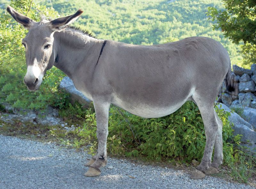

In [7]:
from fastai.vision.all import *
im = Image.open("donkey000001.png")
# icrawler names the downloaded photos from 000001 to 999999
im.to_thumb(256,256)

In [8]:
search_images("horse", 1)

2024-08-17 02:36:46,236 - INFO - icrawler.crawler - start crawling...
2024-08-17 02:36:46,238 - INFO - icrawler.crawler - starting 1 feeder threads...
2024-08-17 02:36:46,240 - INFO - feeder - thread feeder-001 exit
2024-08-17 02:36:46,241 - INFO - icrawler.crawler - starting 1 parser threads...
2024-08-17 02:36:46,244 - INFO - icrawler.crawler - starting 1 downloader threads...


Searching for 'horse'


2024-08-17 02:36:46,863 - INFO - parser - parsing result page https://www.google.com/search?q=horse&ijn=0&start=0&tbs=&tbm=isch
2024-08-17 02:36:47,149 - INFO - downloader - image #1	https://cdn.britannica.com/96/1296-050-4A65097D/gelding-bay-coat.jpg
2024-08-17 02:36:47,193 - INFO - downloader - downloaded images reach max num, thread downloader-001 is ready to exit
2024-08-17 02:36:47,194 - INFO - downloader - thread downloader-001 exit
2024-08-17 02:36:47,248 - INFO - icrawler.crawler - Crawling task done!


2024-08-17 02:36:48,166 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2024-08-17 02:36:48,166 - INFO - parser - thread parser-001 exit


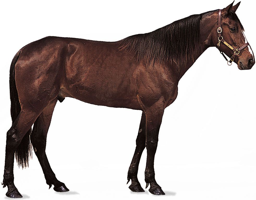

In [9]:
im = Image.open("horse000001.png")
im.to_thumb(256,256)

In [10]:
# This represents the number of photos that'll be downloaded for each category.
# If you don't want to wait you can lower this number so less images will be downloaded.
# Having less images to train on may lead to worse neural network performance.
no_of_photos = 20 # Default is 20

searches = 'horse','donkey','cat','dog'

path = Path('dataset')
from time import sleep

for o in searches:
    dest = (path/o)
    print(f'This is dest, {dest}')
    dest.mkdir(exist_ok=True, parents=True)
    search_images(f"{o} photo", no_of_photos, dest)
    sleep(10)  # Pause between searches to avoid over-loading server
    search_images(f"{o} sun photo", no_of_photos, dest)
    sleep(10)
    search_images(f"{o} night photo", no_of_photos, dest) 
    # Changed this to get "night photo" instead of "shade photo" since the original would cause paint tones to be downloaded 
    sleep(10)
    print(f"Photos of {o} completed!")

resize_images(path, max_size=400, dest=path, recurse=True)
print(f"Photos resized!")

2024-08-17 02:39:18,882 - INFO - icrawler.crawler - start crawling...
2024-08-17 02:39:18,884 - INFO - icrawler.crawler - starting 1 feeder threads...
2024-08-17 02:39:18,885 - INFO - feeder - thread feeder-001 exit
2024-08-17 02:39:18,888 - INFO - icrawler.crawler - starting 1 parser threads...
2024-08-17 02:39:18,890 - INFO - icrawler.crawler - starting 1 downloader threads...


This is dest, dataset\horse
Searching for 'horse photo'


2024-08-17 02:39:19,449 - INFO - parser - parsing result page https://www.google.com/search?q=horse+photo&ijn=0&start=0&tbs=&tbm=isch
2024-08-17 02:39:19,617 - INFO - downloader - image #1	https://i.pinimg.com/736x/89/91/b4/8991b4fbe5d773d11027754965e9ec85.jpg
2024-08-17 02:39:23,362 - INFO - downloader - image #2	https://images.pexels.com/photos/1996333/pexels-photo-1996333.jpeg?cs=srgb&dl=pexels-wildlittlethingsphoto-1996333.jpg
2024-08-17 02:39:23,440 - ERROR - downloader - Response status code 404, file https://images.rawpixel.com/image_png
2024-08-17 02:39:23,473 - ERROR - downloader - Response status code 403, file https://www.rawpixel.com/image/6233428/png
2024-08-17 02:39:23,479 - INFO - downloader - image #3	https://i.pinimg.com/564x/17/03/ee/1703eef13edbb9db29ca72819e6cb8a6.jpg
2024-08-17 02:39:23,521 - INFO - downloader - image #4	https://images.rawpixel.com/image_800/czNmcy1wcml2YXRlL3Jhd3BpeGVsX2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvZnJob3JzZV9nYWxsb3BfY2FudGVyX21hcmUtaW1hZ2Utcm01

Searching for 'horse sun photo'


2024-08-17 02:39:46,579 - INFO - parser - parsing result page https://www.google.com/search?q=horse+sun+photo&ijn=0&start=0&tbs=&tbm=isch
2024-08-17 02:39:46,949 - INFO - downloader - image #1	https://www.shutterstock.com/image-photo/stallion-sunset-260nw-58861361.jpg
2024-08-17 02:39:47,182 - INFO - downloader - image #2	https://www.shutterstock.com/image-photo/horse-smokey-setting-walking-photographer-260nw-1665555277.jpg
2024-08-17 02:39:47,218 - INFO - downloader - image #3	https://w0.peakpx.com/wallpaper/857/172/HD-wallpaper-horses-sun-horse-run-animal.jpg
2024-08-17 02:39:47,786 - ERROR - downloader - Response status code 404, file https://t4.ftcdn.net/jpg
2024-08-17 02:39:47,831 - INFO - downloader - image #4	https://i.pinimg.com/736x/a3/94/b9/a394b9030c13f801a61a22fd6a7629aa.jpg
2024-08-17 02:39:49,451 - INFO - downloader - image #5	https://img.freepik.com/premium-photo/horse-field-with-sun-setting-it_865967-7334.jpg
2024-08-17 02:39:50,975 - INFO - downloader - image #6	https:

Searching for 'horse night photo'


2024-08-17 02:40:24,610 - INFO - parser - parsing result page https://www.google.com/search?q=horse+night+photo&ijn=0&start=0&tbs=&tbm=isch
2024-08-17 02:40:24,826 - INFO - downloader - image #1	https://equusmagazine.com/wp-content/uploads/migrations/equus/horse-at-night.jpg
2024-08-17 02:40:25,097 - INFO - downloader - image #2	https://thumbs.dreamstime.com/b/beautiful-black-horse-galloping-night-beach-misty-sea-as-backdrop-its-hooves-kicking-up-water-ai-generative-majestic-272207354.jpg
2024-08-17 02:40:25,476 - INFO - downloader - image #3	https://www.shutterstock.com/image-photo/portrait-adult-horse-against-dark-600w-1580627422.jpg
2024-08-17 02:40:25,737 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/1165496945/photo/dark-horse-in-silhouette-only-lit-by-moon-light.jpg
2024-08-17 02:40:26,011 - INFO - downloader - image #4	https://i.pinimg.com/474x/24/9c/59/249c59c2e32845bee81d3b5e72ced427.jpg
2024-08-17 02:40:26,579 - ERROR - downloader - Re

Photos of horse completed!
This is dest, dataset\donkey
Searching for 'donkey photo'


2024-08-17 02:41:19,650 - INFO - parser - parsing result page https://www.google.com/search?q=donkey+photo&ijn=0&start=0&tbs=&tbm=isch
2024-08-17 02:41:19,779 - INFO - downloader - image #1	https://cdn.britannica.com/68/143568-050-5246474F/Donkey.jpg
2024-08-17 02:41:19,817 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Donkey_in_Clovelly%2C_North_Devon%2C_England.jpg
2024-08-17 02:41:20,362 - ERROR - downloader - Response status code 404, file https://t4.ftcdn.net/jpg
2024-08-17 02:41:20,373 - INFO - downloader - image #2	https://upload.wikimedia.org/wikipedia/en/6/6c/Donkey_%28Shrek%29.png
2024-08-17 02:41:20,415 - ERROR - downloader - Response status code 404, file https://t3.ftcdn.net/jpg
2024-08-17 02:41:21,826 - INFO - downloader - image #3	https://vgl.ucdavis.edu/sites/g/files/dgvnsk15116/files/styles/sf_landscape_4x3/public/2019-06/Donkey-Species-Image_1.jpg
2024-08-17 02:41:21,890 - INFO - downloader - image #4	h

Searching for 'donkey sun photo'


2024-08-17 02:41:49,581 - INFO - parser - parsing result page https://www.google.com/search?q=donkey+sun+photo&ijn=0&start=0&tbs=&tbm=isch
2024-08-17 02:41:50,590 - INFO - downloader - image #1	https://i.pinimg.com/originals/98/1c/d0/981cd0f668bcea685646fc6e07039c70.jpg
2024-08-17 02:41:50,867 - INFO - downloader - image #2	https://www.shutterstock.com/image-photo/paint-picture-two-donkeys-field-600nw-2490915485.jpg
2024-08-17 02:41:51,097 - INFO - downloader - image #3	https://www.shutterstock.com/image-photo/brown-donkey-waiting-sun-260nw-1158015616.jpg
2024-08-17 02:41:51,386 - INFO - downloader - image #4	https://c8.alamy.com/comp/2FNPWTK/chilling-in-the-sun-donkey-2FNPWTK.jpg
2024-08-17 02:41:51,821 - INFO - downloader - image #5	https://live.staticflickr.com/1969/44131827464_b3c8a2cdb1_b.jpg
2024-08-17 02:41:52,071 - INFO - downloader - image #6	https://c8.alamy.com/comp/2C8W83N/a-donkey-with-a-saddle-is-standing-in-the-sun-and-resting-and-waiting-for-tourists-on-the-viewing-plat

Searching for 'donkey night photo'


2024-08-17 02:42:14,653 - INFO - parser - parsing result page https://www.google.com/search?q=donkey+night+photo&ijn=0&start=0&tbs=&tbm=isch
2024-08-17 02:42:14,895 - INFO - downloader - image #1	https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJbNjTlxTsrgVUtk_xjERsJig67HyBSvNW8A&s","dimg_229":"https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQwZePQb0gK-4IBa4ikdi6n2ds6K0nVJoey5g&s","dimg_231":"https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRqTdeXakqUAuYsbBCW21CwiYictb5Lw2d56Q&s","dimg_251":"https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQRkZjsHjpFbiAOv9CoA9tLaUrNy6xqq6MefA&s","dimg_321":"https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTWhz-t19j_uw02aKnnsGB9cBOHpQkpk2lYzw&s","dimg_327":"https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQboXi89fa3LKUWNnpMsbYBNPBMMa1OL0mYIA&s","dimg_345":"https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRePLWb7LJ2cF9szg9zTPQej02Kq95PKrxGAA&s","dimg_317":"https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR3cn30E-

Photos of donkey completed!
This is dest, dataset\cat
Searching for 'cat photo'


2024-08-17 02:42:30,697 - INFO - parser - parsing result page https://www.google.com/search?q=cat+photo&ijn=0&start=0&tbs=&tbm=isch
2024-08-17 02:42:30,942 - INFO - downloader - image #1	https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg
2024-08-17 02:42:30,987 - INFO - downloader - image #2	https://i.pinimg.com/736x/99/6c/a6/996ca6d41ae979589d3f50e0967cdcb9.jpg
2024-08-17 02:42:32,065 - INFO - downloader - image #3	https://images.unsplash.com/photo-1615789591457-74a63395c990?fm=jpg
2024-08-17 02:42:32,116 - INFO - downloader - image #4	https://www.shutterstock.com/image-photo/cat-yellow-face-sitting-on-600nw-2470054451.jpg
2024-08-17 02:42:33,663 - INFO - downloader - image #5	https://images.pexels.com/photos/2071882/pexels-photo-2071882.jpeg?cs=srgb&dl=pexels-wojciech-kumpicki-1084687-2071882.jpg
2024-08-17 02:42:33,724 - INFO - downloader - image #6	https://img.freepik.com/free-photo/cute-domestic-kitten-sits-window-staring-outside-ge

Searching for 'cat sun photo'


2024-08-17 02:43:54,724 - INFO - parser - parsing result page https://www.google.com/search?q=cat+sun+photo&ijn=0&start=0&tbs=&tbm=isch
2024-08-17 02:43:56,418 - INFO - downloader - image #1	https://img.freepik.com/premium-photo/cat-with-its-eyes-open-sun-shining-it_594776-269.jpg
2024-08-17 02:43:56,777 - INFO - downloader - image #2	https://www.shutterstock.com/image-photo/street-red-cat-basking-sun-600nw-1337916413.jpg
2024-08-17 02:43:56,820 - ERROR - downloader - Response status code 403, file https://preview.redd.it/enjoying-the-winter-sun-v0-kllot4v0nlfa1.jpg
2024-08-17 02:43:59,834 - INFO - downloader - image #3	https://storage.googleapis.com/pod_public/1300/201310.jpg
2024-08-17 02:44:01,034 - INFO - downloader - image #4	https://www.catster.com/wp-content/uploads/2023/11/ginger-cat-streching-at-sunset_Masarik-Shutterstock.jpg
2024-08-17 02:44:02,949 - INFO - downloader - image #5	https://blog.ferplast.com/wp-content/uploads/2020/06/ai-gatti-piace-prendere-sole.jpg
2024-08-17 

Searching for 'cat night photo'


2024-08-17 02:44:26,829 - INFO - parser - parsing result page https://www.google.com/search?q=cat+night+photo&ijn=0&start=0&tbs=&tbm=isch
2024-08-17 02:44:27,347 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/1388926925/photo/close-up-of-striped-gray-stray-cat-looking-up-on-a-black-background.jpg
2024-08-17 02:44:28,855 - INFO - downloader - image #1	https://i.pinimg.com/originals/57/5c/e0/575ce0f7084a8a3fe71a69c7021966ad.jpg
2024-08-17 02:44:29,685 - INFO - downloader - image #2	https://www.burgesspetcare.com/wp-content/uploads/2024/01/black-cat.jpg
2024-08-17 02:44:29,870 - INFO - downloader - image #3	https://i.pinimg.com/236x/d0/bb/1c/d0bb1cdaa409ce8c18c487927a2e8b29.jpg
2024-08-17 02:44:30,426 - ERROR - downloader - Response status code 404, file https://as2.ftcdn.net/v2/jpg
2024-08-17 02:44:31,468 - INFO - downloader - image #4	https://www.joiipetcare.com/wp-content/uploads/2023/10/pexels-jermaine-lewis-18657391-min.jpg
2024-08-17 02:44:33,

Photos of cat completed!
This is dest, dataset\dog
Searching for 'dog photo'


2024-08-17 02:44:59,575 - INFO - parser - parsing result page https://www.google.com/search?q=dog+photo&ijn=0&start=0&tbs=&tbm=isch
2024-08-17 02:44:59,742 - INFO - downloader - image #1	https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg
2024-08-17 02:44:59,828 - INFO - downloader - image #2	https://cdn.pixabay.com/photo/2023/08/18/15/02/dog-8198719_640.jpg
2024-08-17 02:45:00,135 - INFO - downloader - image #3	https://thumbor.forbes.com/thumbor/fit-in/900x510/https://www.forbes.com/advisor/wp-content/uploads/2023/07/top-20-small-dog-breeds.jpeg.jpg
2024-08-17 02:45:00,203 - ERROR - downloader - Response status code 404, file https://images.rawpixel.com/image_png
2024-08-17 02:45:00,259 - ERROR - downloader - Response status code 403, file https://www.rawpixel.com/image/6204307/png
2024-08-17 02:45:00,601 - INFO - downloader - image #4	https://www.hartz.com/wp-content/uploads/2022/04/small-dog-owners-1.jpg
2024-08-17 02:45:00,680 - INFO - 

Searching for 'dog sun photo'


2024-08-17 02:45:15,849 - INFO - parser - parsing result page https://www.google.com/search?q=dog+sun+photo&ijn=0&start=0&tbs=&tbm=isch
2024-08-17 02:45:16,795 - INFO - downloader - image #1	https://upload.wikimedia.org/wikipedia/commons/8/88/Fargo_Sundogs_2_18_09.jpg
2024-08-17 02:45:18,085 - INFO - downloader - image #2	https://c02.purpledshub.com/uploads/sites/48/2024/01/GettyImages-535055296.jpg
2024-08-17 02:45:18,112 - INFO - downloader - image #3	https://cdn.mos.cms.futurecdn.net/EjoEJpCwUK9V7m2c6rSMZN-1200-80.jpg
2024-08-17 02:45:19,055 - INFO - downloader - image #4	https://d3mvlb3hz2g78.cloudfront.net/wp-content/uploads/2016/03/thumb_720_450_f_39.jpg
2024-08-17 02:45:19,378 - INFO - downloader - image #5	https://www.farmersalmanac.com/wp-content/uploads/2021/02/Sun-Pillar-Halo.jpg
2024-08-17 02:45:20,738 - INFO - downloader - image #6	https://d.newsweek.com/en/full/1820403/image-halo-around-sun.jpg
2024-08-17 02:45:21,211 - INFO - downloader - image #7	https://c02.purpledshub

Searching for 'dog night photo'


2024-08-17 02:45:44,834 - INFO - parser - parsing result page https://www.google.com/search?q=dog+night+photo&ijn=0&start=0&tbs=&tbm=isch
2024-08-17 02:45:46,307 - INFO - downloader - image #1	https://media-be.chewy.com/wp-content/uploads/2023/08/15134928/can-dogs-see-in-the-dark-1024x615.jpg
2024-08-17 02:45:46,889 - ERROR - downloader - Response status code 404, file https://t4.ftcdn.net/jpg
2024-08-17 02:45:48,334 - INFO - downloader - image #2	https://image.petmd.com/files/styles/863x625/public/2021-10/while-everyone-sleeps-picture-id1214789804.jpg
2024-08-17 02:45:48,645 - INFO - downloader - image #3	https://toegrips.com/wp-content/uploads/Anxiety-in-dog-sleeping-golden.jpg
2024-08-17 02:45:48,824 - INFO - downloader - image #4	https://www.akc.org/wp-content/uploads/2016/05/Entlebucher-Mountain-Dog-sitting-waiting-in-the-city-at-night.jpg
2024-08-17 02:45:49,740 - INFO - downloader - image #5	https://i.pinimg.com/736x/10/f1/cf/10f1cfaa3545f0fc9ce51fd30a6c0dc3.jpg
2024-08-17 02:45

Photos of dog completed!
Photos resized!


## Step 2: Train our model

In [35]:
# # To remove the files & directory
# dest = (path/'c')
# for file in dest.glob('*'):
#     if file.is_file():
#         file.unlink()
# dest.rmdir()

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [11]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

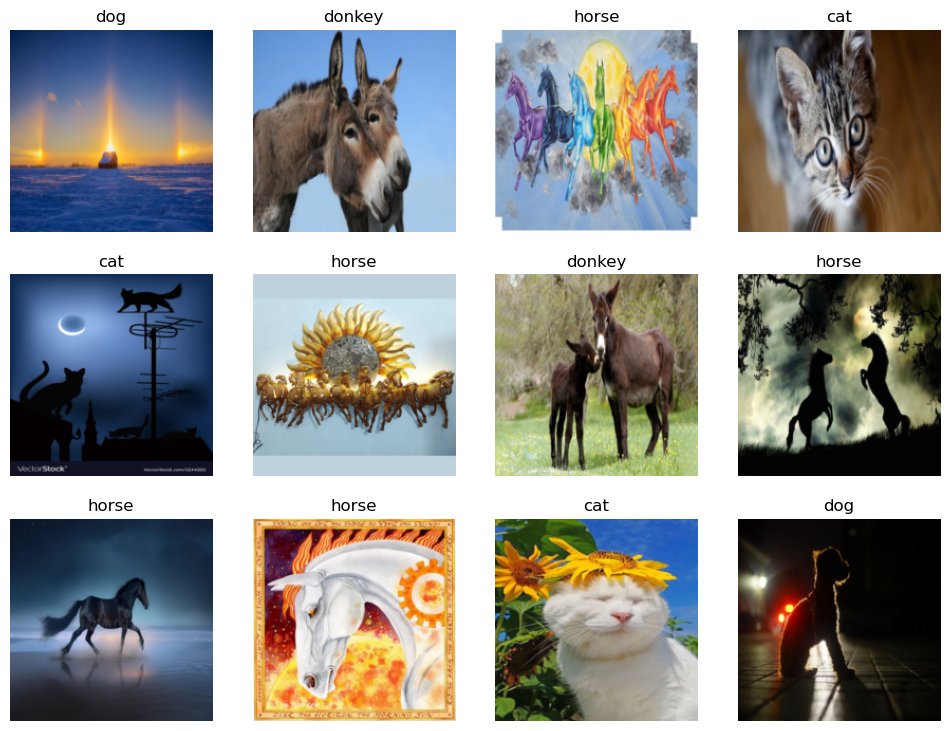

In [12]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

Here what each of the `DataBlock` parameters means:

    blocks=(ImageBlock, CategoryBlock),

The inputs to our model are images, and the outputs are categories (in this case, "donkey", "horse", "cat" or "dog").

    get_items=get_image_files, 

To find all the inputs to our model, run the `get_image_files` function (which returns a list of all image files in a path).

    splitter=RandomSplitter(valid_pct=0.2, seed=42),

Split the data into training and validation sets randomly, using 20% of the data for the validation set.

    get_y=parent_label,

The labels (`y` values) is the name of the `parent` of each file (i.e. the name of the folder they're in, which will be "donkey", "horse", "cat" or "dog").

    item_tfms=[Resize(192, method='squish')]

Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).

Now we're ready to train our model. The fastest widely used computer vision model is `resnet18`. You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)

`fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

In [13]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\User/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100.0%


epoch,train_loss,valid_loss,error_rate,time
0,2.155383,1.252386,0.409091,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.769786,0.968769,0.318182,00:01
1,0.678648,0.826141,0.272727,00:01
2,0.513078,0.867378,0.295455,00:01
3,0.395255,0.993907,0.295455,00:01
4,0.309979,1.072612,0.272727,00:01
5,0.251229,1.068710,0.250000,00:01
6,0.205499,1.083081,0.227273,00:01
7,0.173150,1.066321,0.227273,00:01
8,0.154673,1.061586,0.250000,00:01
9,0.132686,1.053399,0.250000,00:01


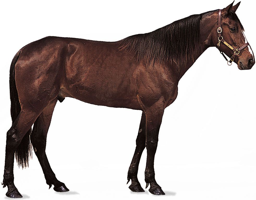

In [16]:
im = Image.open("horse000001.png")
im.to_thumb(256,256)

In [17]:
# Check for category index
classes = list(learn.dls.vocab)

print(classes)

['cat', 'dog', 'donkey', 'horse']


In [18]:
predicted_class,_,probs = learn.predict(im)
print(f"This is a: {predicted_class}.")
predicted_idx = classes.index(predicted_class)
for idx, ele in enumerate(classes):
    print(f"Probability it's a {ele}: {probs[idx]:.4f}")

This is a: horse.
Probability it's a cat: 0.0000
Probability it's a dog: 0.0000
Probability it's a donkey: 0.0000
Probability it's a horse: 1.0000
